# <b>[핸즈온 머신러닝]</b> <br>
# Chapter 04 모델 훈련

## 4.1 선형 회귀

#### [선형 회귀 모델의 예측]
$$ \hat{y} = θ_0 + θ_1x_1 + θ_2x_2 + \cdots + θ_nx_n $$
- $\hat{y}$은 예측값
- $n$은 특성의 수
- $x_i$는 $i$번째 특성값
- $θ_j$는 $j$번째 모델 파라미터 (편향 $θ_0$과 특성의 가중치 $θ_1,θ_2,\cdots,θ_n$을 포함)
<br><br>

#### [선형 회귀 모델의 예측 (벡터 형태)]
$$ \hat{y} = h_θ(x) = θx $$
- $θ$는 편향 $θ_0$과 $θ_1$에서 $θ_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터
- $x$는 $x_0$에서 $x_n$까지 담은 샘플의 `특성 벡터`. $x_0$는 항상 1
- $θ \cdot x$는 벡터 $θ$와 $x$의 점곱. 이는 $ θ_0 + θ_1x_1 + θ_2x_2 + \cdots + θ_nx_n $와 같음
- $h_0$는 모델 파라미터 $θ$를 사용한 가설 (hypothesis) 함수
<br><br>

- 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
- 회귀에서 가장 널리 사용하는 성능 측정 지표는 평균 제곱근 오차(RMSE)이므로 RMSE를 최소화하는 $θ$를 찾아야 함
- 실제로는 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 더 간단함
<br><br>

#### 훈련 세트 $X$에 대한 선형 회귀 가설 $h_θ$의 MSE 비용 함수
$$ MSE(X,h_θ) = MSE(θ) = \frac1m \sum_{i=1}^m(θ^Tx^{(i)}-y^{(i)})^2 $$

### 4.4.1 정규방정식 <br>
- `정규방정식`(normal equation): 비용 함수를 최소화하는 $θ$값을 찾기 위한 해석적인 방법
$$ \hat{θ} = (X^TX)^-1X^Ty $$
- $\hat{θ}$은 비용 함수를 최소화하는 $θ$값
- $y$는 $y^(1)$부터 $y^(m)$까지 포함하는 타깃 벡터

In [171]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [172]:
X_b = np.c_[np.ones((100,1)),X] #모든 샘플에 x0=1 추가, np.c_: 열 방향 병합
#np.linalg.inv(): 역행렬 계산, dot(): 행렬 곱셈
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [173]:
theta_best

array([[3.98861833],
       [2.9531308 ]])

In [174]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0=1 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98861833],
       [9.89487992]])

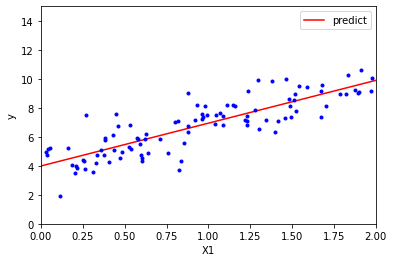

In [175]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,'r-',label='predict')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.legend()
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98861833]), array([[2.9531308]]))

In [177]:
lin_reg.predict(X_new)

array([[3.98861833],
       [9.89487992]])

In [178]:
#scipy.linalg.lstsq(): 최소 제곱 함수
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.98861833],
       [2.9531308 ]])

- `scipy.linalg.lstsq()` 함수: $\hat{θ} = X^+y$ 계산
- $X^+$는 $X$의 유사역행렬 (pseudoinverse)
- `np.linalg.pinv()` 함수를 사용해 유사역행렬을 직접 구할 수 있음

In [179]:
np.linalg.pinv(X_b).dot(y)

array([[3.98861833],
       [2.9531308 ]])

- 유사역행렬은 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨
- SVD는 훈련 세트 행렬 $X$를 3개의 행렬 곱셈 $U\sum V^T$로 분해함
- 유사역행렬은 $X^+=V\sum^+U^T$로 계산됨
- $\sum^+$를 계산하기 위해 알고리즘이 $\sum$를 먼저 구하고 그다음 어떤 낮은 임계값보다 작은 모든 수를 0으로 바꿈
- 그다음 0이 아닌 모든 값을 역수로 치환하고 마지막으로 만들어진 행렬을 전치함
- 이는 정규방정식을 계산하는 것보다 더 효율적이며, 극단적인 경우도 처리할 수 있음
- 실제로 $m<n$이거나 어떤 특성이 중복되어 $X^TX$의 역행렬이 없다면 (특이 행렬이라면) 정규방정식이 작동하지 않지만 유사역행렬은 항상 구할 수 있음

### 4.1.2  계산 복잡도 <br>
- 정규방정식은 (n+1)x(n+1) 크기가 되는 $X^TX$의 역행렬을 계산함 (n은 특성 수)
- 역행렬을 계산하는 계산 복잡도는 일반적으로 $O(n^2.4)에서 O(n^3)$ 사이임
- 즉, 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4}=5.3$에서 $2^3=8$배로 증가함
- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(n^2)$임
- 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠름
- 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이며, 예측하려는 샘플 혹은 특성이 두 배로 늘어나면 걸리는 시간도 거의 두 배 증가함

## 4.2 경사 하강법 <br>
- `경사 하강법(gradient descent, GD)`: 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것
- $θ$를 임의의 값으로 시작해서 (무작위 초기화) 한 번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킴
- 학습 스텝 크기는 비용 함수의 기울기에 비례하기 때문에 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어듦
<br>

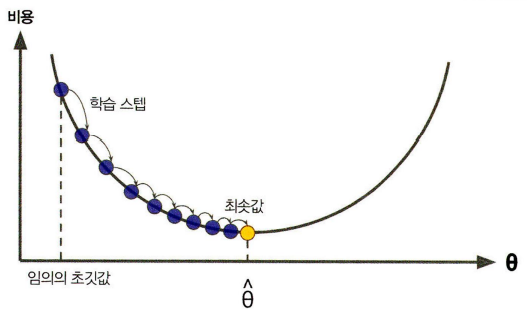 <br>
- 경사 하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼파라미터로 결정됨
- 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸림
<br><br>

#### 학습률이 너무 작을 때
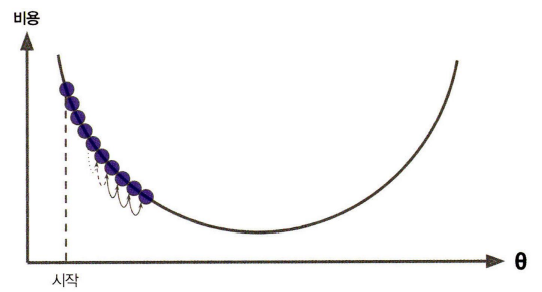
<br><br>

#### 학습률이 너무 클 때
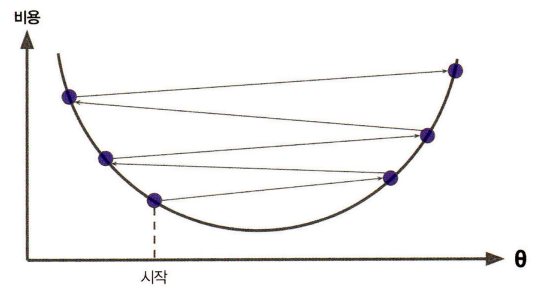
<br><br>

#### 경사 하강법의 문제점
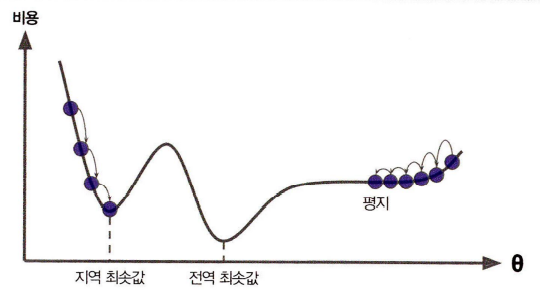
<br>
- 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴함
- 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함
<br><br>
- 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록 함수임
- 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이며, 연속된 함수이고 기울기가 갑자기 변하지 않음
- 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함
<br><br>

#### 특성 스케일을 적용한 경사 하강법(왼쪽)과 적용하지 않은 경사 하강법(오른쪽)
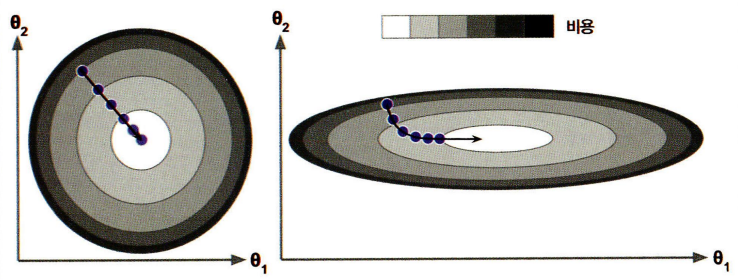
<br>
- 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달함
- 반면에 오른쪽 그래프는 처음엔 전역 최솟값이 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나감 (시간이 오래 걸림)
- 따라서, 경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 함 (예시: 사이킷런의 StandardScaler 사용)
- 모델 훈련: 훈련 세트에서 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일 (모델의 파라미터 공간에서 찾음)
- 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워짐

### 4.2.1 배치 경사 하강법 <br>
- 경사 하강법을 구현하려면 각 모델 파라미터 $θ_j$에 대해 비용 함수의 그레이디언트를 계산해야 함
- 다시 말해, $θ_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 하며 이를 편도함수 (partial derivative)라고 함
<br><br>

#### 비용 함수의 편도함수
$$ \frac∂{∂θ_j}MSE(θ) = \frac2m \sum_{i=1}^m(θ^Tx^{(i)}-y^{(i)})x^{(i)}_j $$
<br><br>
- 편도 함수를 각각 계산하는 대신 아래의 식을 사용하여 한꺼번에 계산할 수 있음
- 그래디언트 벡터 $∇_θMSE(θ)$는 비용 함수의 편도함수를 모두 담고 있음
<br><br>

#### 비용 함수의 그레이디언트 벡터
$$ ∇_θMSE(θ) = \begin{pmatrix} \frac∂{∂θ_0}MSE(θ) \\ \frac∂{∂θ_1}MSE(θ) \\ \cdots \\ \frac∂{∂θ_n}MSE(θ) \end{pmatrix} = \frac2m X^T(Xθ-y) $$
- 이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $X$에 대해 계산하므로 이 알고리즘을 `배치 경사 하강법 (batch gradient descent)`라고 함
- 이런 이유로 매우 큰 훈련 세트에서는 아주 느리지만 경사 하강법은 특성 수에 민감하지 않음
- 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠름
<br><br>

#### 경사 하강법의 스텝
$$ θ^{(next \ step)} = θ - η∇_θMSE(θ) $$
- 위로 향하는 그레이디언트 벡터가 구해지면 반대 방향인 아래로 가야함
- 여기서 학습률 $η$가 사용되는데 내려가는 스텝의 크기를 결정하기 위해 그레이디언트 벡터에 $η$를 곱함

In [180]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [181]:
theta #정규방정식으로 찾은 것과 같음

array([[3.98861833],
       [2.9531308 ]])

#### 여러 가지 학습률에 대한 경사 하강법 <br>
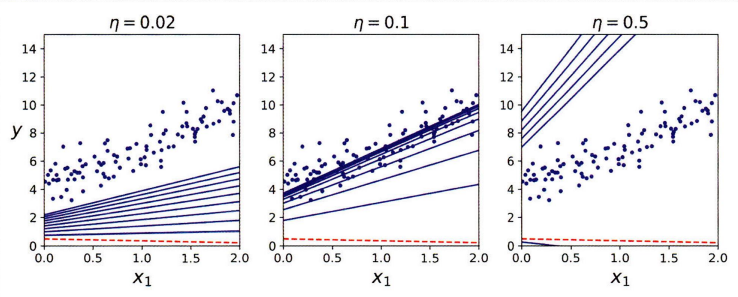
<br>
- 왼쪽은 학습률이 너무 낮아서 시간이 오래 걸릴 것으로 보임
- 가운데는 학습률이 적당해보임
- 오른쪽은 학습률이 너무 높아 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 점점 더 멀어져 발산함
<br><br>
- 적절한 학습률을 찾으려면 그리드 탐색을 사용하지만 그리드 탐색에서 수렴하는 데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 함
- 반복 횟수가 너무 작으면 최적점에 도달하기 전에 알고리즘이 멈춤
- 반복 횟수가 너무 크면 모델 파라미터가 더는 변하지 않는 동안 시간을 낭비하게 됨
- 간단한 해결책은 반복 횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 ε(허용오차, tolerance)보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하는 것임

### 4.2.2 확률적 경사 하강법 <br>
- 배치 경사 하강법의 가장 큰 문제는 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산한다는 사실임 (훈련 세트가 커지면 매우 느려짐)
- 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산함
- 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한 번에 하나의 샘플을 처리하면 알고리즘이 확실히 훨씬 빠름
- 또한, 매 반복에서 하나의 샘플만 메모리에 있으면 되므로 매우 큰 훈련 세트도 훈련시킬 수 있음
<br><br>
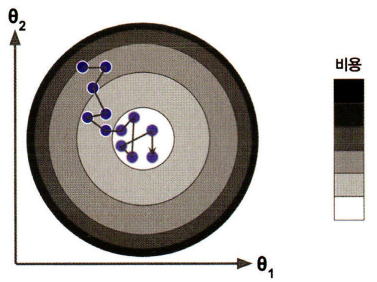 <br>
- 반면에, 확률적(무작위)이기 때문에 이 알고리즘은 배치 경사 하강법보다 훨씬 불안정함
- 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고 위아래로 요동치면서 평균적으로 감소함
- 시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 최솟값에 안착하지 못할 것임
- 즉, 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 최적치는 아님
<br><br>
- 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주므로 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성이 높음
- 무작위성은 지역 최솟값에서 탈출시켜줘서 좋지만 알고리즘을 전역 최솟값에 다다르지 못하게 한다는 점에서 좋지 않음
- 이 딜레마를 해결하는 방법은 학습률을 점진적으로 감소시키는 것임
- 시작할 때는 학습률을 크게 하고 (수렴을 빠르게 해서 지역 최솟값에 빠지지 않게 함), 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함
<br><br>
- `학습 스케줄 (learning schedule)`: 매 반복에서 학습률을 결정하는 함수
- 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있음
- 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음

In [182]:
n_epochs = 50
t0, t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

- 일반적으로 한 반복에서 m번 되풀이 되고, 이때 각 반복을 에포크(epoch)라고 함

In [183]:
theta

array([[4.00671488],
       [2.91728523]])

### 확률적 경사 하강법의 첫 20개 스텝
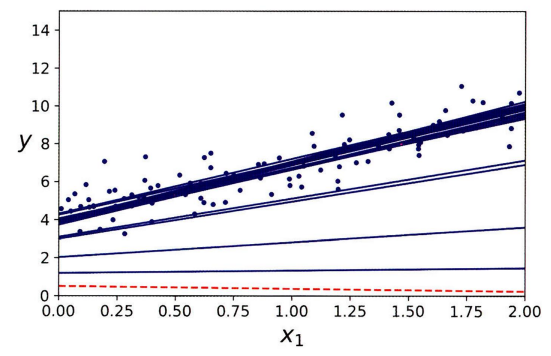 <br>
- 샘플을 무작위로 선택하기 때문에 어떤 샘플은 한 에포크에서 여러 번 선택될 수 있고 어떤 샘플은 전혀 선택되지 못할 수도 있음
- 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있으나 이렇게 하면 보통 더 늦게 수렴됨
<br><br>
- 사이킷런에서 SGD 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용함

In [184]:
from sklearn.linear_model import SGDRegressor
#max_iter=1000: 최대 1000번 에포크동안 실행
#tol=1e-3: 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행됨
#eta0=0.1: 학습률 0.1로 기본 학습 스케줄 사용
#penalty=None: 규제 사용 안함
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [185]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.9853771]), array([2.95521343]))

### 4.2.3 미니배치 경사 하강법 <br>
- 미니배치 경사 하강법 (mini-batch gradient descent)은 각 스텝에서 전체 훈련 세트(배치 경사 하강법)나 하나의 샘플(확률적 경사 하강법)을 기반으로 그레이디언트를 계산하는 것이 아니라 `미니배치`라 부르는 임의의 작은 샘플 세트에 대해 그레이디언트를 계산함
- 확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상임
<br><br>
- 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임
- 결국 미니배치 경사 하강법이 SGD보다 최솟값에 더 가까이 도달하게 될 것이지만 지역 최솟값에서 빠져나오기는 더 힘들 수도 있음
<br><br>
#### 파라미터 공간에 표시된 경사 하강법의 경로
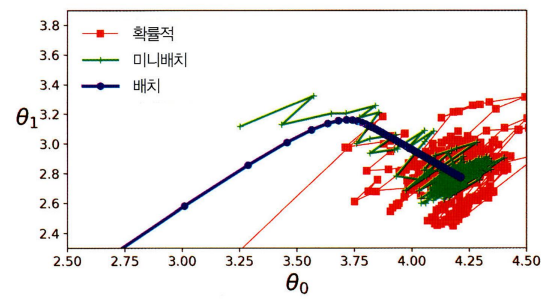 <br>
#### 선형 회귀를 사용한 알고리즘 비교
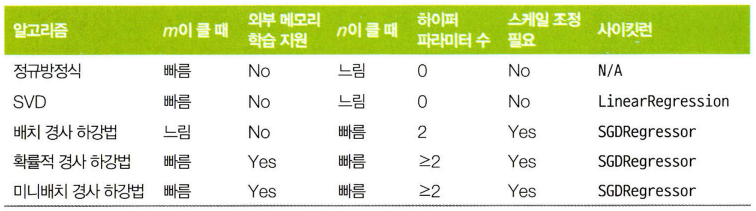

## 4.3 다항 회귀<br>
- `다항 회귀 (polynomial regression)`: 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 기법

In [186]:
#2차방정식 비선형 데이터
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

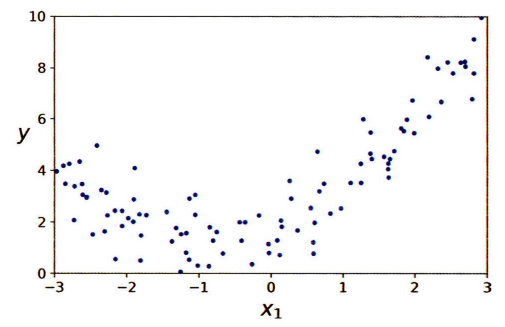

In [187]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.77880403])

In [188]:
X_poly[0]

array([-2.77880403,  7.72175183])

In [189]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04397551]), array([[1.06316225, 0.52595698]]))

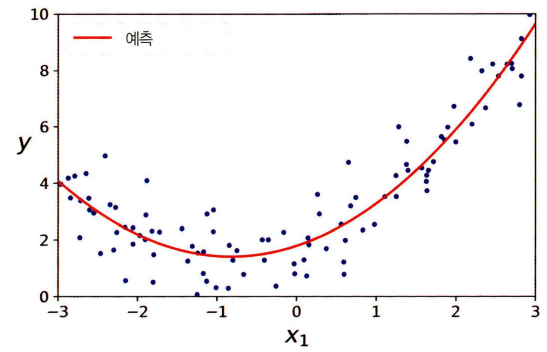
<br>
- PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에 특성이 여러 개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음
- 두 개의 특성 $a,b$가 있을 때 degree=3으로 PolynomialFeatures를 적용하면 $a^2,a^3,b^2,b^3$ 뿐만 아니라 $ab,a^2b,ab^2$도 특성으로 추가함

## 4.4 학습 곡선 <br>
#### 고차 다항 회귀
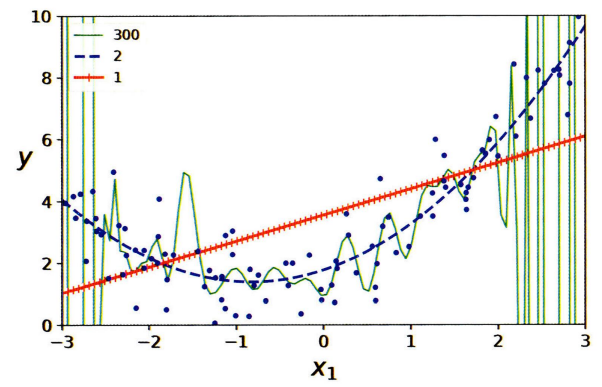
<br><br>
- 이 고차 다항 회귀 모델은 심각하게 훈련 데이터에 과대적합되어 있는 반면에 선형 모델은 과소적합임
- 이 경우 가장 일반화가 잘된 모델은 2차 다항 회위임
<br><br>
- 모델이 데이터에 과대적합 또는 과소적합되었는지 확인하려면 교차 검증을 사용할 수 있음
- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 과대적합된 것이고, 양쪽에 모두 좋지 않으면 과소적합임
<br><br>
- 또 다른 방법은 `학습 곡선`을 살펴보는 것임
- 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기 (또는 훈련 반복)의 함수로 나타냄
- 이 그래프를 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [190]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='Train Set')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='Test Set')
    plt.ylim([0, 3.0])
    plt.xlabel('Train Set Size')
    plt.ylabel('RMSE')
    plt.show()

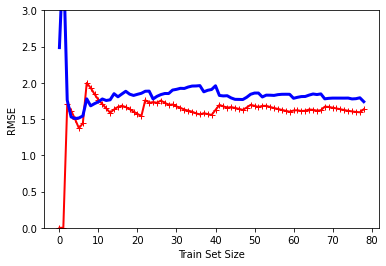

In [191]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

- 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있는 과소적합 모델의 전형적인 모델

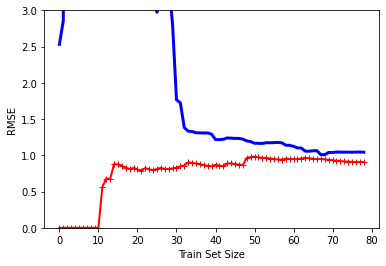

In [192]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression,X,y)

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이의 공간이 있음. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특징임. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워짐
<br><br>
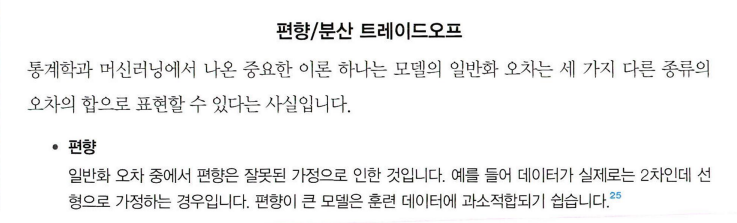


## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀 <br>
- 릿지(Ridge) 회귀 (티호노트 규제)는 규제가 추가된 선형 회귀 버전으로, 규제항 $α\sum_{i=1}^nθ_i^2$이 비용 함수에 추가됨
- 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함
- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함
<br><br>
- 하이퍼파라미터 $α$는 모델을 얼마나 많이 규제할지 조절하며 $α$=0이면 릿지 회귀는 선형 회귀와 같아짐
- $α$가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨
<br><br>

#### 릿지 회귀의 비용 함수
$$ J(θ) = MSE(θ) + α \frac12 \sum_{i=1}^nθ_i^2 $$
<br><br>

#### 다양한 수준의 릿지 규제를 사용한 선형 회귀(왼쪽)과 다항 회귀(오른쪽)
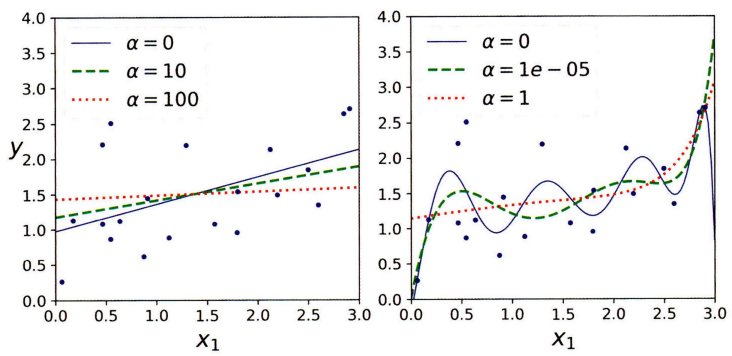
- $α$를 증가시킬수록 직선에 가까워짐
- 즉, 모델의 분산은 줄지만 편향은 커지게 됨
<br><br>

#### 릿지 회귀의 정규방정식
$$ \hat{θ} = (X^TX+αA)^{-1}X^Ty $$
- $A$는 편향에 해당하는 맨 왼쪽 위의 원소가 0인 (n+1)x(n+1)의 단위행렬
- 선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고, 경사 하강법을 사용할 수도 있음

In [193]:
#정규방정식을 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky') #solver의 default값은 'auto'이며 희소행렬이나 특이행렬이 아닐 경우 'cholesky'
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.72841836]])

In [194]:
#확률적 경사 하강법을 사용한 릿지 회귀
sgd_reg = SGDRegressor(penalty='l2') #penalty: 사용할 규제 지정, 'l2': 릿지 회귀
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.69708448])

### 4.5.2 라쏘 회귀 <br>
- 라쏘 (least absolute shrinkage and selection operator, Lasso) 회귀는 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 $l_2$ 노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$ 노름을 사용함
<br><br>

#### 라쏘 회귀의 비용 함수
$$ J(θ) = MSE(θ) + α \sum_{i=1}^n|θ_i| $$
<br><br>

#### 다양한 수준의 라쏘 규제를 사용한 선형 회귀(왼쪽)와 다항 회귀(오른쪽)
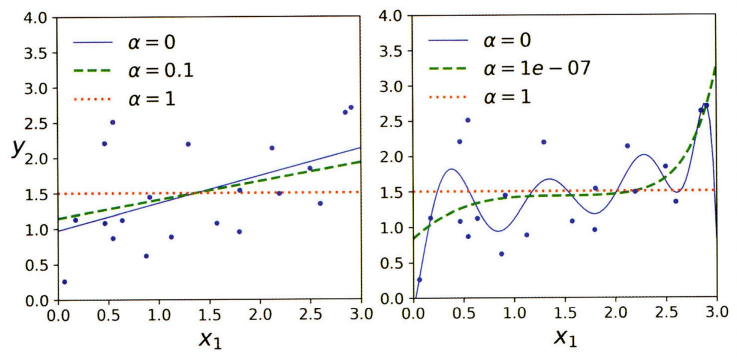
<br>
- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 것임
- 라쏘 회귀는 자동으로 특성 선택을 하고 `희소 모델 (sparse model)`을 만듦 (즉, 0이 아닌 특성의 가중치가 적음)
<br><br>

#### 라쏘 대 릿지 규제
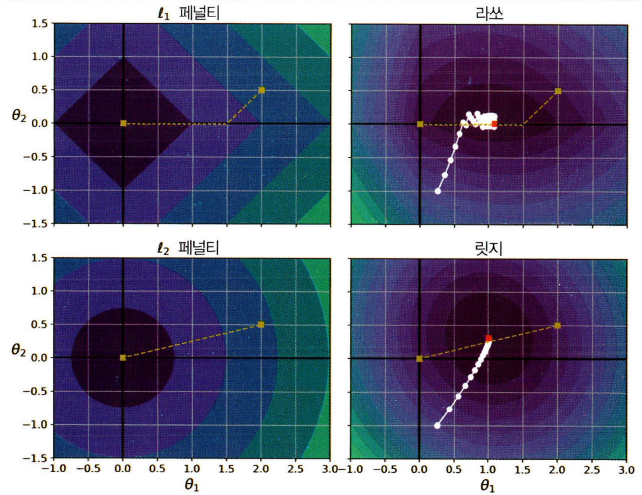
<br>
- 릿지가 라쏘와 다른 점:
    - 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아져서 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨 (진동이 없음)
    - $α$를 증가시킬수록 최적의 파라미터가 원점에 가까워지지만 완전히 0이 되지는 않음
<br><br>
- 라쏘의 비용 함수는 $θ_i=0 (i=1,2,3,\cdots,n일 때)$에서 미분 가능하지 않음
- 하지만 $θ_i=0$일 때 `서브그레이디언트 벡터 (subgradient vector)`를 사용하면 경사 하강법을 적용하는 데 문제가 없음
<br><br>

#### 라쏘 회귀의 서브그레이디언트 벡터
$$ g(θ,J) = ∇_0MSE(θ) + α\begin{pmatrix} sign(θ_1) \\ sign(θ_2) \\ \cdots \\ sign(θ_n) \end{pmatrix} $$
<br>
$$ 여기서 \space sign(θ_i)=\begin{cases} -1 \space θ_i<0일 때 \\ \space θ_i=0일 때 \\ +1 \space θ_i>0일 때 \end{cases} $$

In [195]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) #Lasso 대신 SGDRegrssor(penalty='l1')을 사용할 수도 있음
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.66826265])

### 4.5.3 엘라스틱넷 <br>
- 엘라스틱넷 (elastic net)은 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 라쏘 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 $r$을 사용해 조절함
- $r=0$이면 엘라스틱넷은 릿지 회귀와 같고, $r=1$이면 라쏘 회귀와 같음
<br><br>

#### 엘라스틱넷 비용 함수
$$ J(θ) = MSE(θ) + rα \sum_{i=1}^n|θ_i| +  \frac{1-r}2  α \sum_{i=1}^nθ_i^2$$
<br><br>
- 규제가 약간 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피해야 함
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 나음
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다는 엘라스틱넷을 선호함

In [196]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.67291162])

### 4.5.4 조기 종료 <br>
- 조기 종료 (ealry stopping): 경사 하강법과 같은 반복적인 알고리즘을 규제하는 아주 색다른 방식으로, 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
<br><br>

#### 조기 종료 규제
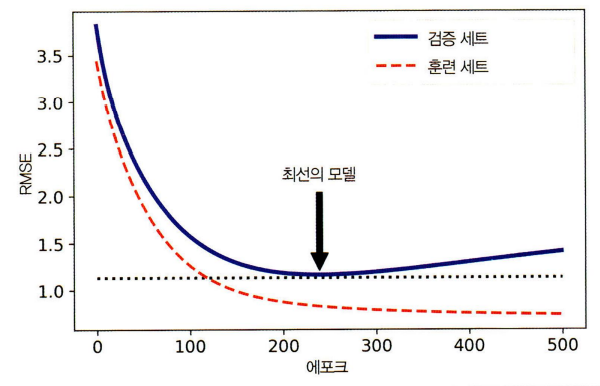
<br>
- 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어듦
- 그러나 잠시 후 감소하던 검증 에러가 멈추었다가 다시 상승하며 이는 모델이 훈련 데이터에 과대적합되기 시작했다는 것을 의미함
- 조기 종료는 검증 에러가 최소에 도달하는 즉시 훈련을 멈추는 것으로 매우 효과적이고 간단함

In [197]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

#데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

#warm_start=True: fit() 메소드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                      penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error <  minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀 <br>
- 로지스틱 회귀 (logistic regression)는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨
- 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함 (레이블이 '1'인 `양성 클래스`)
- 아니면 클래스에 속하지 않는다고 예측함 (레이블이 '0'인 `음성 클래스`)
- 이를 이진 분류기라고 함

### 4.6.1 확률 추정 <br>
- 로지스틱 회귀는 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향을 더함으로써 작동함
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력함
<br><br>

#### 로지스틱 회귀 모델의 확률 추정 (벡터 표현식)
$$ \hat(p) = h_θ(x) = σ(θ^Tx) $$
- 로지스틱 ($σ(\cdot)$)은 0과 1 사이의 값을 출력하는 `시그모이드 함수`임
<br><br>

#### 로지스틱 함수
$$ σ(t) = \frac1{1+exp(-t)} $$
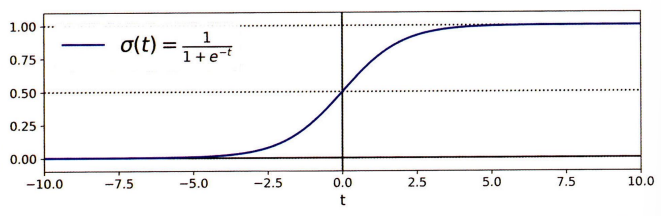
<br><br>

#### 로지스틱 회귀 모델 예측
$$ \hat(y) = \begin{cases} 0 \space \space \space \space \space \hat{p}< 0.5일\space때 \\ 1 \space \space \space \space \space \hat{p}\ge0.5일\space때 \end{cases} $$
- $t<0$이면 $σ(t)<0.5$이고, $t\ge0$이면 $σ(t)\ge0.5$이므로 로지스틱 회귀 모델은 $θ^Tx$가 양수일 때 1(양성 클래스)이라고 예측하고, 음수일 때 0(음성 클래스)이라고 예측함

### 4.6.2 훈련과 비용 함수 <br>
- 로지스틱 회귀 모델의 훈련의 목적은 양성 샘플 (y=1)에 대해서는 높은 확률을 추정하고 음성 샘플 (y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $θ$를 찾는 것임
<br><br>

#### 하나의 훈련 샘플에 대한 비용 함수
$$ c(θ) = \begin{cases} -log(\hat{p}) & y=1일\space때 \\ -log(1-\hat{p}) & y=0일\space때 \end{cases} $$
- 이 비용 함수는 $t$가 0에 가까워지면 $-log(t)$가 매우 커지므로 타당하다고 할 수 있음
- 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가함
- 음성 샘플을 1에 가까운 확률로 추정해도 비용이 증가함
- 반면에, $t$가 1에 가까우면 $-log(t)$는 0에 가까워짐
- 즉, 기대한대로 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워짐
<br><br>

#### 로지스틱 회귀의 비용 함수(로그 손실)
$$ J(θ) = -\frac1m \sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})] $$
- 이 비용 함수의 최솟값을 계산하는 알려진 해가 없지만, 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장함
<br><br>

#### 로지스틱 비용 함수의 편도함수
$$ \frac∂{∂θ_j}J(θ) = \frac1m \sum_{i=1}^m(σ(θ^Tx^{(i)}-y^{(i)})x_j^{(i)} $$
- 각 샘플에 대해 예측 오차를 계산하고 $j$번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄
- 모든 편도함수를 포함한 그레이디언트 벡터를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음
- 확률적 경사 하강법은 한 번에 하나의 샘플을 사용하고 미니배치 경사 하강법은 한 번에 하나의 미니배치를 사용함

### 4.6.3 결정 경계

In [198]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [199]:
X = iris['data'][:,3:] #꽃잎의 너비
y = (iris['target']==2).astype(np.int) #Iris-Virginica면 1, 그렇지 않으면 0

In [201]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

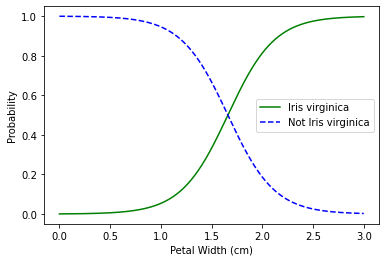

In [204]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris virginica')
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.show()

- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 `결정 경계 (decision boundary)`가 만들어짐
- 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측할 것임

In [205]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

#### 선형 결정 경계
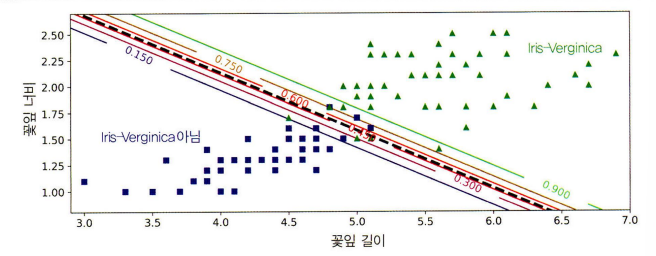
<br><br>
- 다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1, l_2$ 페널티를 사용하여 규제할 수 있음
- 사이킷런은 $l_2$ 페널티를 기본으로 함

### 4.6.4 소프트맥스 회귀 <br>
- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있으며 이를 `소프트맥스 회귀 (softmax regression)` 또는 `다항 로지스틱 회귀 (multinomial logistic regression)`이라고 함
- 샘플 $x$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수 $s_k(x)$를 계산하고, 그 점수에 소프트맥수 함수 (정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정함
<br><br>

#### 클래스 $k$에 대한 소프트맥스 점수
$$ s_k(x) = (θ^{(k)})^Tx $$
- 각 클래스는 자신만의 파라미터 벡터 $θ^{(k)}$가 있음
- 이 벡터들은 파라미터 행렬 $θ$에 행으로 저장됨
<br><br>
- 샘플 $x$에 대해 각 클래스의 점수가 계산되면 소프트맥수 함수를 통과시켜 클래스 $k$에 속할 확률 $\hat{p_k}$을 추정할 수 있음
- 이 함수는 각 점수에 지수 함수를 적용한 후 정규화함 (모든 지수 함수 결과의 합으로 나눔)
- 일반적으로 이 점수를 로짓 또는 로그-오즈라고 부름
<br><br>

#### 소프트맥스 함수
$$ \hat{p_k}=σ(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^Kexp(s_j(x))} $$
- $K$는 클래스 수
- $s(x)$는 샘플 $x$에 대한 각 클래스의 점수를 담은 벡터
- $σ(s(x))_k$는 샘플 $x$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률
- 소프트맥스 회귀 분류기는 로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택함
<br><br>

#### 소프트맥스 회귀 분류기의 예측
$$ \hat{y} = \underset{k}{argmax}σ(s(x))_k = \underset{k}{argmax}s_k(x) = \underset{k}{argmax}((θ^{(k)})^Tx) $$
- argmax 연산은 함수를 최대화하는 변수의 값을 반환함
- 이 식에서는 추정 확률 $σ(s(x))_k$가 최대인 $k$값을 반환함
- 소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측하므로 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서만 사용해야 함
<br><br>

- 모델이 타깃 클래스에 대해서는 높은 확률을, 다른 클래스에 대해서는 낮은 확률을 추정하도록 만드는 것이 목적임
- `크로스 엔트로피 (cross entropy)` 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함
- 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용됨
<br><br>

#### 크로스 엔트로피 비용 함수
$$ J(θ) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)}log(\hat{p}_k^{(i)}) $$
- 이 식에서 $y_k^{(i)}$는 $i$번째 샘플이 클래스 $k$에 속할 타깃 확률임
- 일반적으로 샘플이 클래스에 속하는지 아닌지에 따라 1 또는 0이 됨
- 두 개의 클래스가 있을 때 ($K=2$) 이 비용 함수는 로지스틱 회귀의 비용 함수와 같음
<br><br>

#### 클래스 $K$에 대한 크로스 엔트로피의 그레이디언트 벡터
$$ ∇_{θ^{(k)}}J(θ) = \frac1m \sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)} $$
- 이제 각 클래스에 대한 그레이디언트 벡터를 계산할 수 있으므로 비용 함수를 최소화하기 위한 파라미터 행렬 $θ$를 찾기 위해 경사 하강법을 사용할 수 있음

In [207]:
X = iris['data'][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y = iris['target']

#multi_class='multinomial', solver='lbfgs': 소프트맥스 회귀
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [208]:
softmax_reg.predict([[5,2]])

array([2])

In [209]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

#### 소프트맥스 회귀 결정 경계
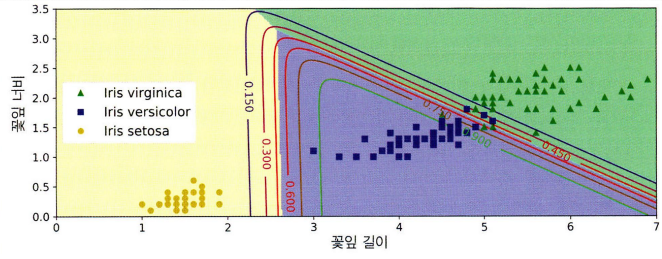